# Feature Extractor

In [9]:
import tensorflow as tf
tf.random.set_seed(221)

import matplotlib.pyplot as plt
import os
from PIL import Image
import torch

extract_feature = True

Pickle

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Resnet50

In [11]:
if extract_feature:
    import timm

    model = timm.create_model(
        'resnet50.a1_in1k',
        pretrained=True,
        num_classes=0,  # remove classifier nn.Linear
    )
    model = model.eval()

    # get model specific transforms (normalization, resize)
    data_config = timm.data.resolve_model_data_config(model)
    transforms = timm.data.create_transform(**data_config, is_training=False)


Test print image from Cifar 10

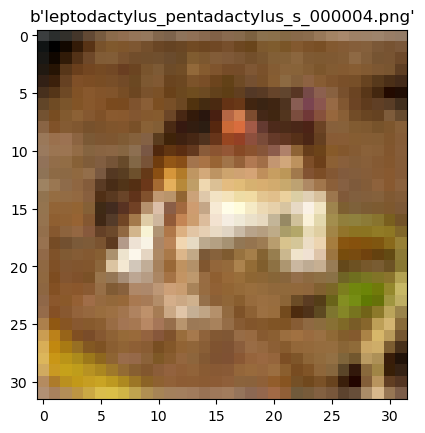

In [4]:
if extract_feature:
    test = unpickle('E:/Work/DS/Datasets/Raw/cifar-10-batches-py/train/data_batch_1')

    img = test[b'data'][0].reshape((3,32,32)).transpose(1,2,0).astype("uint8") # frog???
    label = test[b'filenames'][0]
    plt.imshow(img)
    plt.title(label)
    plt.show()

Load CIFAR 10

In [5]:
import pandas as pd
if extract_feature:
    # Directory containing subdirectories for each class
    base_dir = 'E:/Work/DS/Datasets/Raw/cifar-10-batches-py/train'

    cifar10 = []

    # Iterate through each subdirectory
    for batch_file_name in os.listdir(base_dir):
        file_dir = os.path.join(base_dir, batch_file_name)
        cifar10.append(unpickle(file_dir))


Process images from the cifar10 for the unwrapper

In [6]:
def process_minibatch(minibatch):
    batch_data = []
    for image in minibatch:
        # Convert to PIL image format
        img = Image.fromarray(image.reshape(3,32,32).transpose(1,2,0))
        # transform to model format and stack
        img = transforms(img)
        batch_data.append(img)
    batch_data = torch.stack(batch_data)
    # run through the resnet
    processed_data = model(batch_data)
    return processed_data

In [13]:
def feature_extraction(file):

    output_df = pd.DataFrame(columns=['Class'])

    MINIBATCH_SIZE = 200


    for k,batch in enumerate(file):
        print('processing batch', k+1)
        # get images
        images = batch[b'data']
        labels = batch[b'labels']
        # Convert the list of images to a batch tensor
        for i in range(0,int(10000/MINIBATCH_SIZE)):
            print('processing minibatch %d out of %d' %(i+1 , int(10000/MINIBATCH_SIZE)))
            minibatch = images[i*MINIBATCH_SIZE:(i+1)*MINIBATCH_SIZE]

            # get features and put into df format
            minibatch_output = process_minibatch(minibatch)
            minibatch_output_df = pd.DataFrame(minibatch_output.detach().numpy(), columns=[f'features_{i}' for i in range(2048)])
            minibatch_output_df['Class'] = labels[i*MINIBATCH_SIZE:(i+1)*MINIBATCH_SIZE]

            output_df = pd.concat([output_df, minibatch_output_df], ignore_index=True)
    return output_df

In [14]:
if extract_feature:
    output_df = feature_extraction(cifar10)
    output_df.to_csv('extracted_features_train.csv', index = False)
else:
    output_df = pd.read_csv('extracted_features_train.csv')

processing batch 1
processing minibatch 1 out of 50
processing minibatch 2 out of 50
processing minibatch 3 out of 50
processing minibatch 4 out of 50
processing minibatch 5 out of 50
processing minibatch 6 out of 50
processing minibatch 7 out of 50
processing minibatch 8 out of 50
processing minibatch 9 out of 50
processing minibatch 10 out of 50
processing minibatch 11 out of 50
processing minibatch 12 out of 50
processing minibatch 13 out of 50
processing minibatch 14 out of 50
processing minibatch 15 out of 50
processing minibatch 16 out of 50
processing minibatch 17 out of 50
processing minibatch 18 out of 50
processing minibatch 19 out of 50
processing minibatch 20 out of 50
processing minibatch 21 out of 50
processing minibatch 22 out of 50
processing minibatch 23 out of 50
processing minibatch 24 out of 50
processing minibatch 25 out of 50
processing minibatch 26 out of 50
processing minibatch 27 out of 50
processing minibatch 28 out of 50
processing minibatch 29 out of 50
proc

In [15]:
print(output_df.head())
print(output_df.shape)

  Class  features_0  features_1  features_2  features_3  features_4  \
0     6    0.151325         0.0    0.005591    0.056937    0.077207   
1     9    0.006480         0.0    0.000000    0.088447    0.000000   
2     9    0.070884         0.0    0.087924    0.010057    0.246442   
3     4    0.012119         0.0    0.133780    0.044016    0.003058   
4     1    0.000000         0.0    0.000000    0.000000    0.199462   

   features_5  features_6  features_7  features_8  ...  features_2038  \
0    0.094270    0.000000    0.020582         0.0  ...            0.0   
1    0.012987    0.000000    0.000000         0.0  ...            0.0   
2    0.000000    0.000000    0.033094         0.0  ...            0.0   
3    0.061593    0.001908    0.061323         0.0  ...            0.0   
4    0.000942    0.043705    0.183811         0.0  ...            0.0   

   features_2039  features_2040  features_2041  features_2042  features_2043  \
0            0.0       0.000000       0.000000       0

Do the same for test set

In [17]:
if extract_feature:
    cifar10_test = [unpickle('E:/Work/DS/Datasets/Raw/cifar-10-batches-py/test_batch')]
    test = feature_extraction(cifar10_test)
    test.to_csv('extracted_features_test.csv', index = False)
else:
    test = pd.read_csv('extracted_features_test.csv')

processing batch 1
processing minibatch 1 out of 50
processing minibatch 2 out of 50
processing minibatch 3 out of 50
processing minibatch 4 out of 50
processing minibatch 5 out of 50
processing minibatch 6 out of 50
processing minibatch 7 out of 50
processing minibatch 8 out of 50
processing minibatch 9 out of 50
processing minibatch 10 out of 50
processing minibatch 11 out of 50
processing minibatch 12 out of 50
processing minibatch 13 out of 50
processing minibatch 14 out of 50
processing minibatch 15 out of 50
processing minibatch 16 out of 50
processing minibatch 17 out of 50
processing minibatch 18 out of 50
processing minibatch 19 out of 50
processing minibatch 20 out of 50
processing minibatch 21 out of 50
processing minibatch 22 out of 50
processing minibatch 23 out of 50
processing minibatch 24 out of 50
processing minibatch 25 out of 50
processing minibatch 26 out of 50
processing minibatch 27 out of 50
processing minibatch 28 out of 50
processing minibatch 29 out of 50
proc

In [18]:
print(test.head())
print(test.shape)

  Class  features_0  features_1  features_2  features_3  features_4  \
0     3    0.014825    0.000090    0.000000    0.181920    0.139676   
1     8    0.000000    0.000000    0.000000    0.013524    0.106261   
2     8    0.000000    0.000000    0.006366    0.000000    0.013763   
3     0    0.000000    0.007869    0.000000    0.043529    0.661214   
4     6    0.020482    0.000000    0.000000    0.000000    0.011000   

   features_5  features_6  features_7  features_8  ...  features_2038  \
0    0.000000    0.473413    0.000000    0.000000  ...       0.000000   
1    0.000000    0.000000    0.064642    0.000000  ...       0.000000   
2    0.000000    0.024497    0.101541    0.000000  ...       0.000000   
3    0.024933    0.061378    0.265805    0.054627  ...       0.004609   
4    0.002379    0.004604    0.013784    0.000000  ...       0.001879   

   features_2039  features_2040  features_2041  features_2042  features_2043  \
0            0.0       0.002492       0.004320       0